In [44]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt

## Генерація точок

In [2]:
len_1, len_2, len_3 = 150000, 200000, 150000 # кількість точок у кожному згенерованому кластері

### Код

In [3]:
# Розподіл точок запропонований викладачем
def x1(x):
    return np.sqrt(2)/2*(x[0]+x[1])
    
def y1(x):
    return np.sqrt(2)/2*(x[1]-x[0])

origin_1 = np.array(([i for i in zip(np.random.normal(-15, 3, (len_1)), np.random.normal(0, 5.5, (len_1)))]))
origin_1 = np.array([(x1(i), y1(i)) for i in origin_1])

In [4]:
origin_2 = np.array(([i for i in zip(np.random.normal(20, 4, (len_2)), np.random.normal(17, 2.5, (len_2)))]))

In [5]:
origin_3 = np.array(([i for i in zip(np.random.normal(6, 4, (len_3)), np.random.normal(33, 2.5, (len_3)))]))

In [6]:
origin = [origin_1, origin_2, origin_3]

In [7]:
dataset = np.concatenate([origin_1, origin_2, origin_3], axis=0)

## Візуалізація точок 3-х розподілів

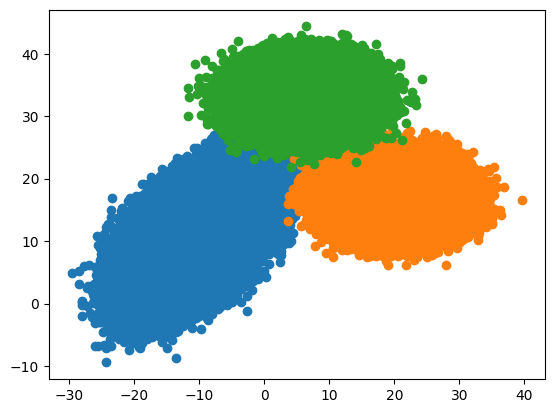

In [8]:
for origin_cluster in origin:
    plt.scatter([(i[0]) for i in origin_cluster], [(i[1]) for i in origin_cluster])

## Нормалізація множин
Використана мінімаксна нормалізація

In [9]:
min_val, max_val = np.min(dataset), np.max(dataset)

origin_1 = (origin_1-min_val)/(max_val-min_val)
origin_2 = (origin_2-min_val)/(max_val-min_val)
origin_3 = (origin_3-min_val)/(max_val-min_val)

origin_normalized = [origin_1, origin_2, origin_3]

dataset = np.concatenate([origin_1, origin_2, origin_3])

In [10]:
dataset.shape

(500000, 2)

In [88]:
from sklearn.datasets import make_blobs
dataset, clusters = make_blobs(n_samples = 1000000,
                  n_features = 2, 
                  centers = 3,
                  cluster_std = 0.4,
                  shuffle = True)

## Формування вибірки _X_<sub>_0_</sub>

In [89]:
sample = np.random.randint(len(dataset), size=int(0.05*len(dataset))) # вибірка індексів X0

X0 = dataset[sample]

## Формування перших 2-х кластерів

In [90]:
def dist(a, b):
    x = a[0]-b[0]
    y = a[1]-b[1]
    return x*x+y*y

In [91]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [92]:
hull = ConvexHull(X0)

In [93]:
dists = []
for p1 in X0[hull.vertices]:
    for p2 in X0[hull.vertices]:
        dists.append((dist(p1, p2), p1, p2))
dists.sort(key=lambda x: x[0])
_, center_1, center2 = dists[-1]

In [94]:
сentroids = [center_1, center2]

## Формування решти центроїдів

In [95]:
K = 3 # загальна кількість центроїдів

In [96]:
for p in range(K-2):
    candidates = []
    for x0 in X0:
        dists = []
        for centroid in сentroids:
            dists.append(dist(x0, centroid))
        candidates.append((min(dists), x0))
    candidates.sort(key=lambda x: x[0])
    сentroids.append(candidates[-1][1])

### Вибрані центроїди

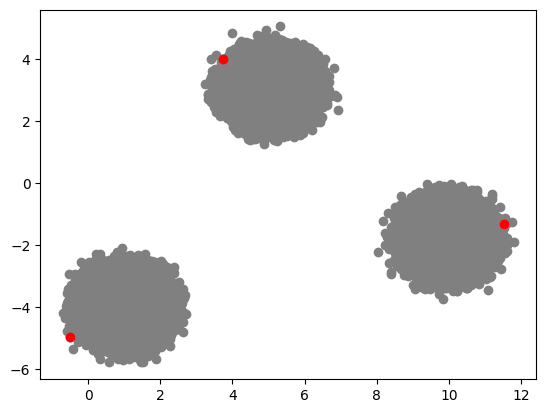

In [97]:
plt.scatter([(i[0]) for i in dataset], [(i[1]) for i in dataset], color="gray")
plt.scatter([(i[0]) for i in сentroids], [(i[1]) for i in сentroids], color="red")

## Ітераційний процес розподілу на кластери

In [98]:
iteration_count = 0
cluster_map = np.zeros(len(dataset)) # кожну точку відмічаємо індексом кластера 
E = 0 #entropy
while True:
    e=0
    for p_i in range(len(dataset)):
        _ = []
        for c_i in range(len(сentroids)):
            _.append((dist(dataset[p_i], сentroids[c_i]), c_i))
        _.sort(key=lambda x: x[0])
        cluster_map[p_i] = _[0][1] 
        e+=_[0][0]
    centroids_new = []
    iteration_count+=1
    if e==E:
        break
    E=e
    
    for c_i in range(len(сentroids)):
        points = dataset[cluster_map==c_i]
        temp_x = np.sum(points[:,0])/len(points)
        temp_y = np.sum(points[:,1])/len(points)
        centroids_new.append(
            (temp_x, temp_y)
        )
    сentroids = centroids_new

print(f"Було виконано {iteration_count} ітерацій")
        

Було виконано 3 ітерацій


In [99]:
clusters = [dataset[cluster_map==i] for i in range(len(сentroids))]

In [100]:
set_clusters = [set(list(zip(i[:,0], i[:,1]))) for i in clusters]
set_origins = [set(list(zip(i[:,0], i[:,1]))) for i in origin_normalized]

In [101]:
result_table = np.zeros((3, 3))
for i in range(len(origin_normalized)):
    for j in range(len(clusters)):
        result_table[i,j] = len(set_clusters[i].intersection(set_origins[j]))
result_table/=len(dataset)
np.around(result_table, 3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## Візуалізація результатів

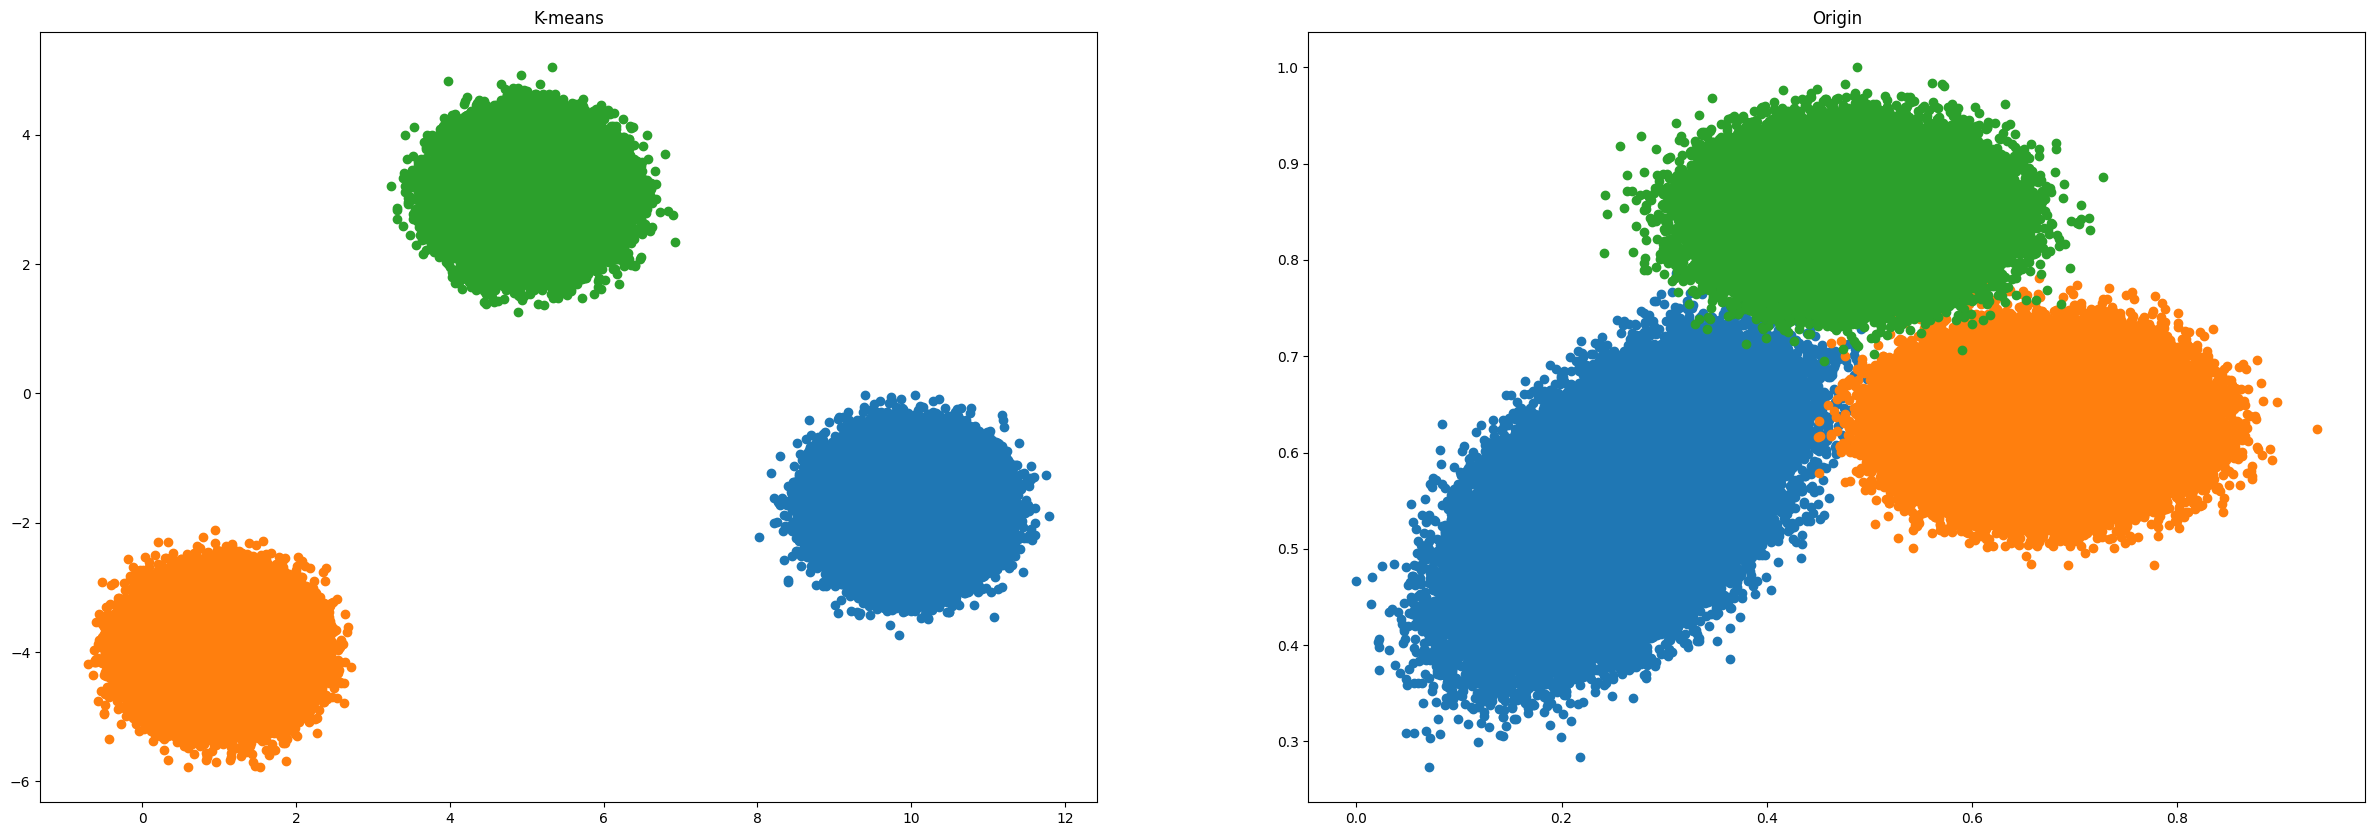

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30, 10))
ax1.set_title("K-means")
for cluster in clusters:
    ax1.scatter([(i[0]) for i in cluster], [(i[1]) for i in cluster])

ax2.set_title("Origin")
for origin_cluster in origin_normalized:
    ax2.scatter([(i[0]) for i in origin_cluster], [(i[1]) for i in origin_cluster])